In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
%matplotlib inline

In [2]:
df = pd.read_excel('/home/vivek/Downloads/table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls')
df.columns = ['City', 'population', 'violent crime', 'murder', 'rape', 'rape^2', 'robbery', 'aggravated assault', 'property crime', 'burglary', 'larceny-theft', 'motor vehicle theft', 'arson^3']

In [3]:
df = df.drop(['rape', 'arson^3', 'aggravated assault', 'rape^2', 'burglary', 'larceny-theft', 'motor vehicle theft', 'violent crime'], axis=1)
df = df.drop([3])

In [6]:
df = df.dropna()

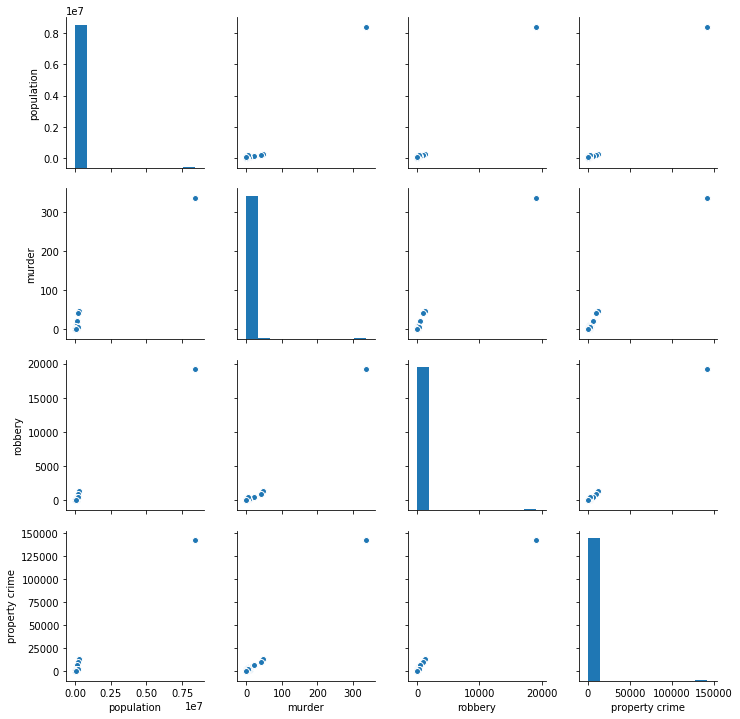

In [9]:
sns.pairplot(df)

**There is one outlier in every feature.**

In [16]:
df = df[df['population'] < df['population'].max()]
df = df[df['murder'] < df['murder'].max()]
df = df[df['robbery'] < df['robbery'].max()]
df = df[df['property crime'] < df['property crime'].max()]

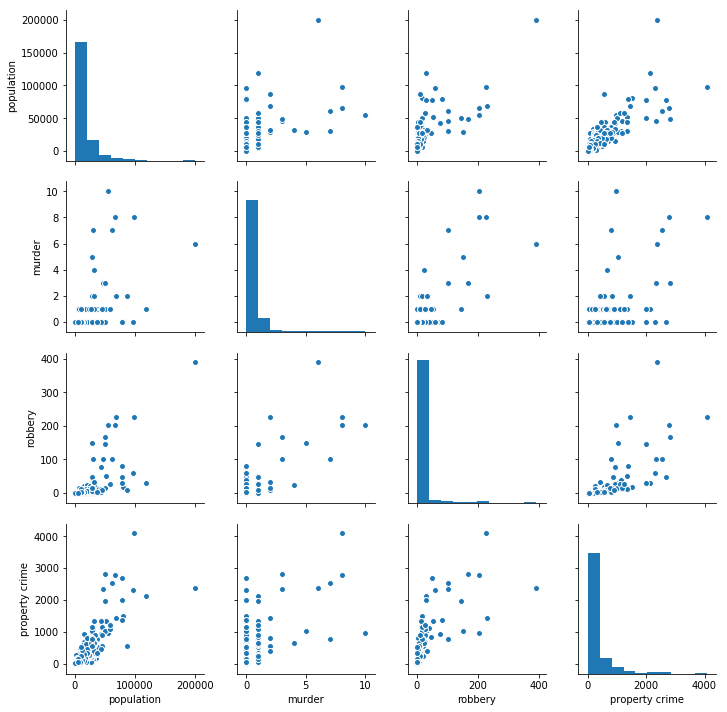

In [18]:
sns.pairplot(df)

Now, it looks much better

In [21]:
df['population^2'] = df['population'] * df['population']
df.loc[df['murder']>0, 'murder'] = 1
df.loc[df['robbery']>0, 'robbery'] = 1

In [22]:
x = df[['population', 'population^2', 'murder', 'robbery']]
y = df['property crime']

In [23]:
reg = linear_model.LinearRegression()

In [24]:
reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [25]:
reg.score(x,y)

0.7336457941182253

## Multivariate normality

(344,)


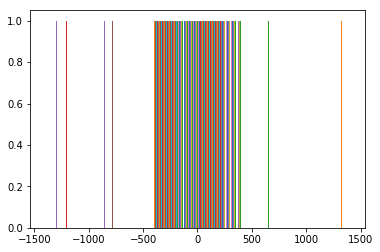

In [42]:
residual = y - reg.predict(x).ravel()
print(residual.shape)
plt.hist(residual, bins=[-1500, -500, 500, 1500])
plt.show()